# Analysis of Energy Trading as well as Dynamic Pricing Amongst Microgrids


- 8 Microgrids are Considered
- Comparision of Constant Pricing as well as Dynamic Pricing is shown

### Importing the Libraries

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import math
%matplotlib notebook

### Configuration of Smart Grids (Lambda Values)
- Agent 1 : [5.0672,4.4150,5.0967,5.1631], Total : 19.7420
- Agent 2 : [4.5686,4.9671,4.9942,4.6172], Total : 19.1471
- Agent 3 : [3.3972,3.6215,3.3983,4.4020], Total : 14.8189
- Agent 4 : [2.6044,2.4534,3.6837,2.6472], Total : 11.3887
- Agent 5 : [0.0201,1.7532,7.8576,3.6710], Total : 13.3020
- Agent 6 : [ 0,0.7350,8.6901,5.7239], Total = 15.1490
- Agent 7 : [0.0000,0.5410,6.5965,4.3712], Total = 11.5086
- Agent 8 : [0,0.0000,6.0057,3.6077], Total = 9.6134

# Constant Pricing

# Preprocessing

### Entering the Paths of the Files

In [2]:
adl_log_path_constant = './constant-pricing/logs/adl_logger.txt'
battery_log_path_constant = './constant-pricing/logs/battery_logger.txt'
logger_updates_path_constant = './constant-pricing/logs/logger_updates.txt'
nd_log_path_constant = './constant-pricing/logs/nd_logger.txt'
prices_log_path_constant = './constant-pricing/logs/price_logger.txt'
rewards_log_path_constant = './constant-pricing/logs/reward_logger.txt'
transmission_log_path_constant = './constant-pricing/logs/transmission_logger.txt'

### Creating the Necessary Variables

In [3]:
# Agent Configurations
num_of_agents = 8
num_of_time_steps = 4

# Agent Lists
adl_constant = []
battery_constant = []
average_rewards_constant = []
nd_constant = []
prices_constant = []
rewards_constant = []
transmission_constant = []

for i in range(num_of_agents):
    adl_constant.append([])
    battery_constant.append([])
    average_rewards_constant.append([])
    nd_constant.append([])
    prices_constant.append([])
    rewards_constant.append([])
    transmission_constant.append([])
    
for i in range(num_of_agents):
    for j in range(num_of_time_steps):
        adl_constant[i].append([])
        battery_constant[i].append([])
        nd_constant[i].append([])
        prices_constant[i].append([])
        rewards_constant[i].append([])
        transmission_constant[i].append([])

###  ADL Scheduling

In [4]:
j = 0
with open(adl_log_path_constant,'r') as re:
    for line in re:
        list_ = line.strip().split()
        for i in range(num_of_agents):
            if j == num_of_time_steps:
                j = 0
            adl_constant[i][j].append(float(list_[i]))
        j +=1

### Battery

In [5]:
j = 0
with open(battery_log_path_constant,'r') as re:
    for line in re:
        list_ = line.strip().split()
        for i in range(num_of_agents):
            if j == num_of_time_steps:
                j = 0
            battery_constant[i][j].append(float(list_[i]))
        j +=1

### ND

In [6]:
j = 0
with open(nd_log_path_constant,'r') as re:
    for line in re:
        list_ = line.strip().split()
        for i in range(num_of_agents):
            if j == num_of_time_steps:
                j = 0
            nd_constant[i][j].append(float(list_[i]))
        j +=1

### Prices

In [7]:
j = 0
with open(prices_log_path_constant,'r') as re:
    
    for line in re:
        list_ = line.strip().split()
        for i in range(num_of_agents):
            if j == num_of_time_steps:
                j = 0
            prices_constant[i][j].append(float(list_[i]))
        j +=1

### Rewards

In [8]:
j = 0
with open(rewards_log_path_constant,'r') as re:
    for line in re:
        list_ = line.strip().split()
        for i in range(num_of_agents):
            if j == num_of_time_steps:
                j = 0
            rewards_constant[i][j].append(float(list_[i]))
        j +=1

### Transmission Log

In [9]:
j = 0
with open(transmission_log_path_constant,'r') as re:
    for line in re:
        list_ = line.strip().split()
        for i in range(num_of_agents):
            if j == num_of_time_steps:
                j = 0
            transmission_constant[i][j].append(float(list_[i]))
        j +=1

### Average Rewards

In [10]:
string = 'reward'
j = 0
with open(logger_updates_path_constant,'r') as re:
    for line in re:
        if j == num_of_agents:
            j = 0
        if string in line:
            list_ = line.strip().split()
            average_rewards_constant[j].append(float(list_[(len(list_)) - 1]))
            j+=1

# Graphs

### Convergence of all 8 agents

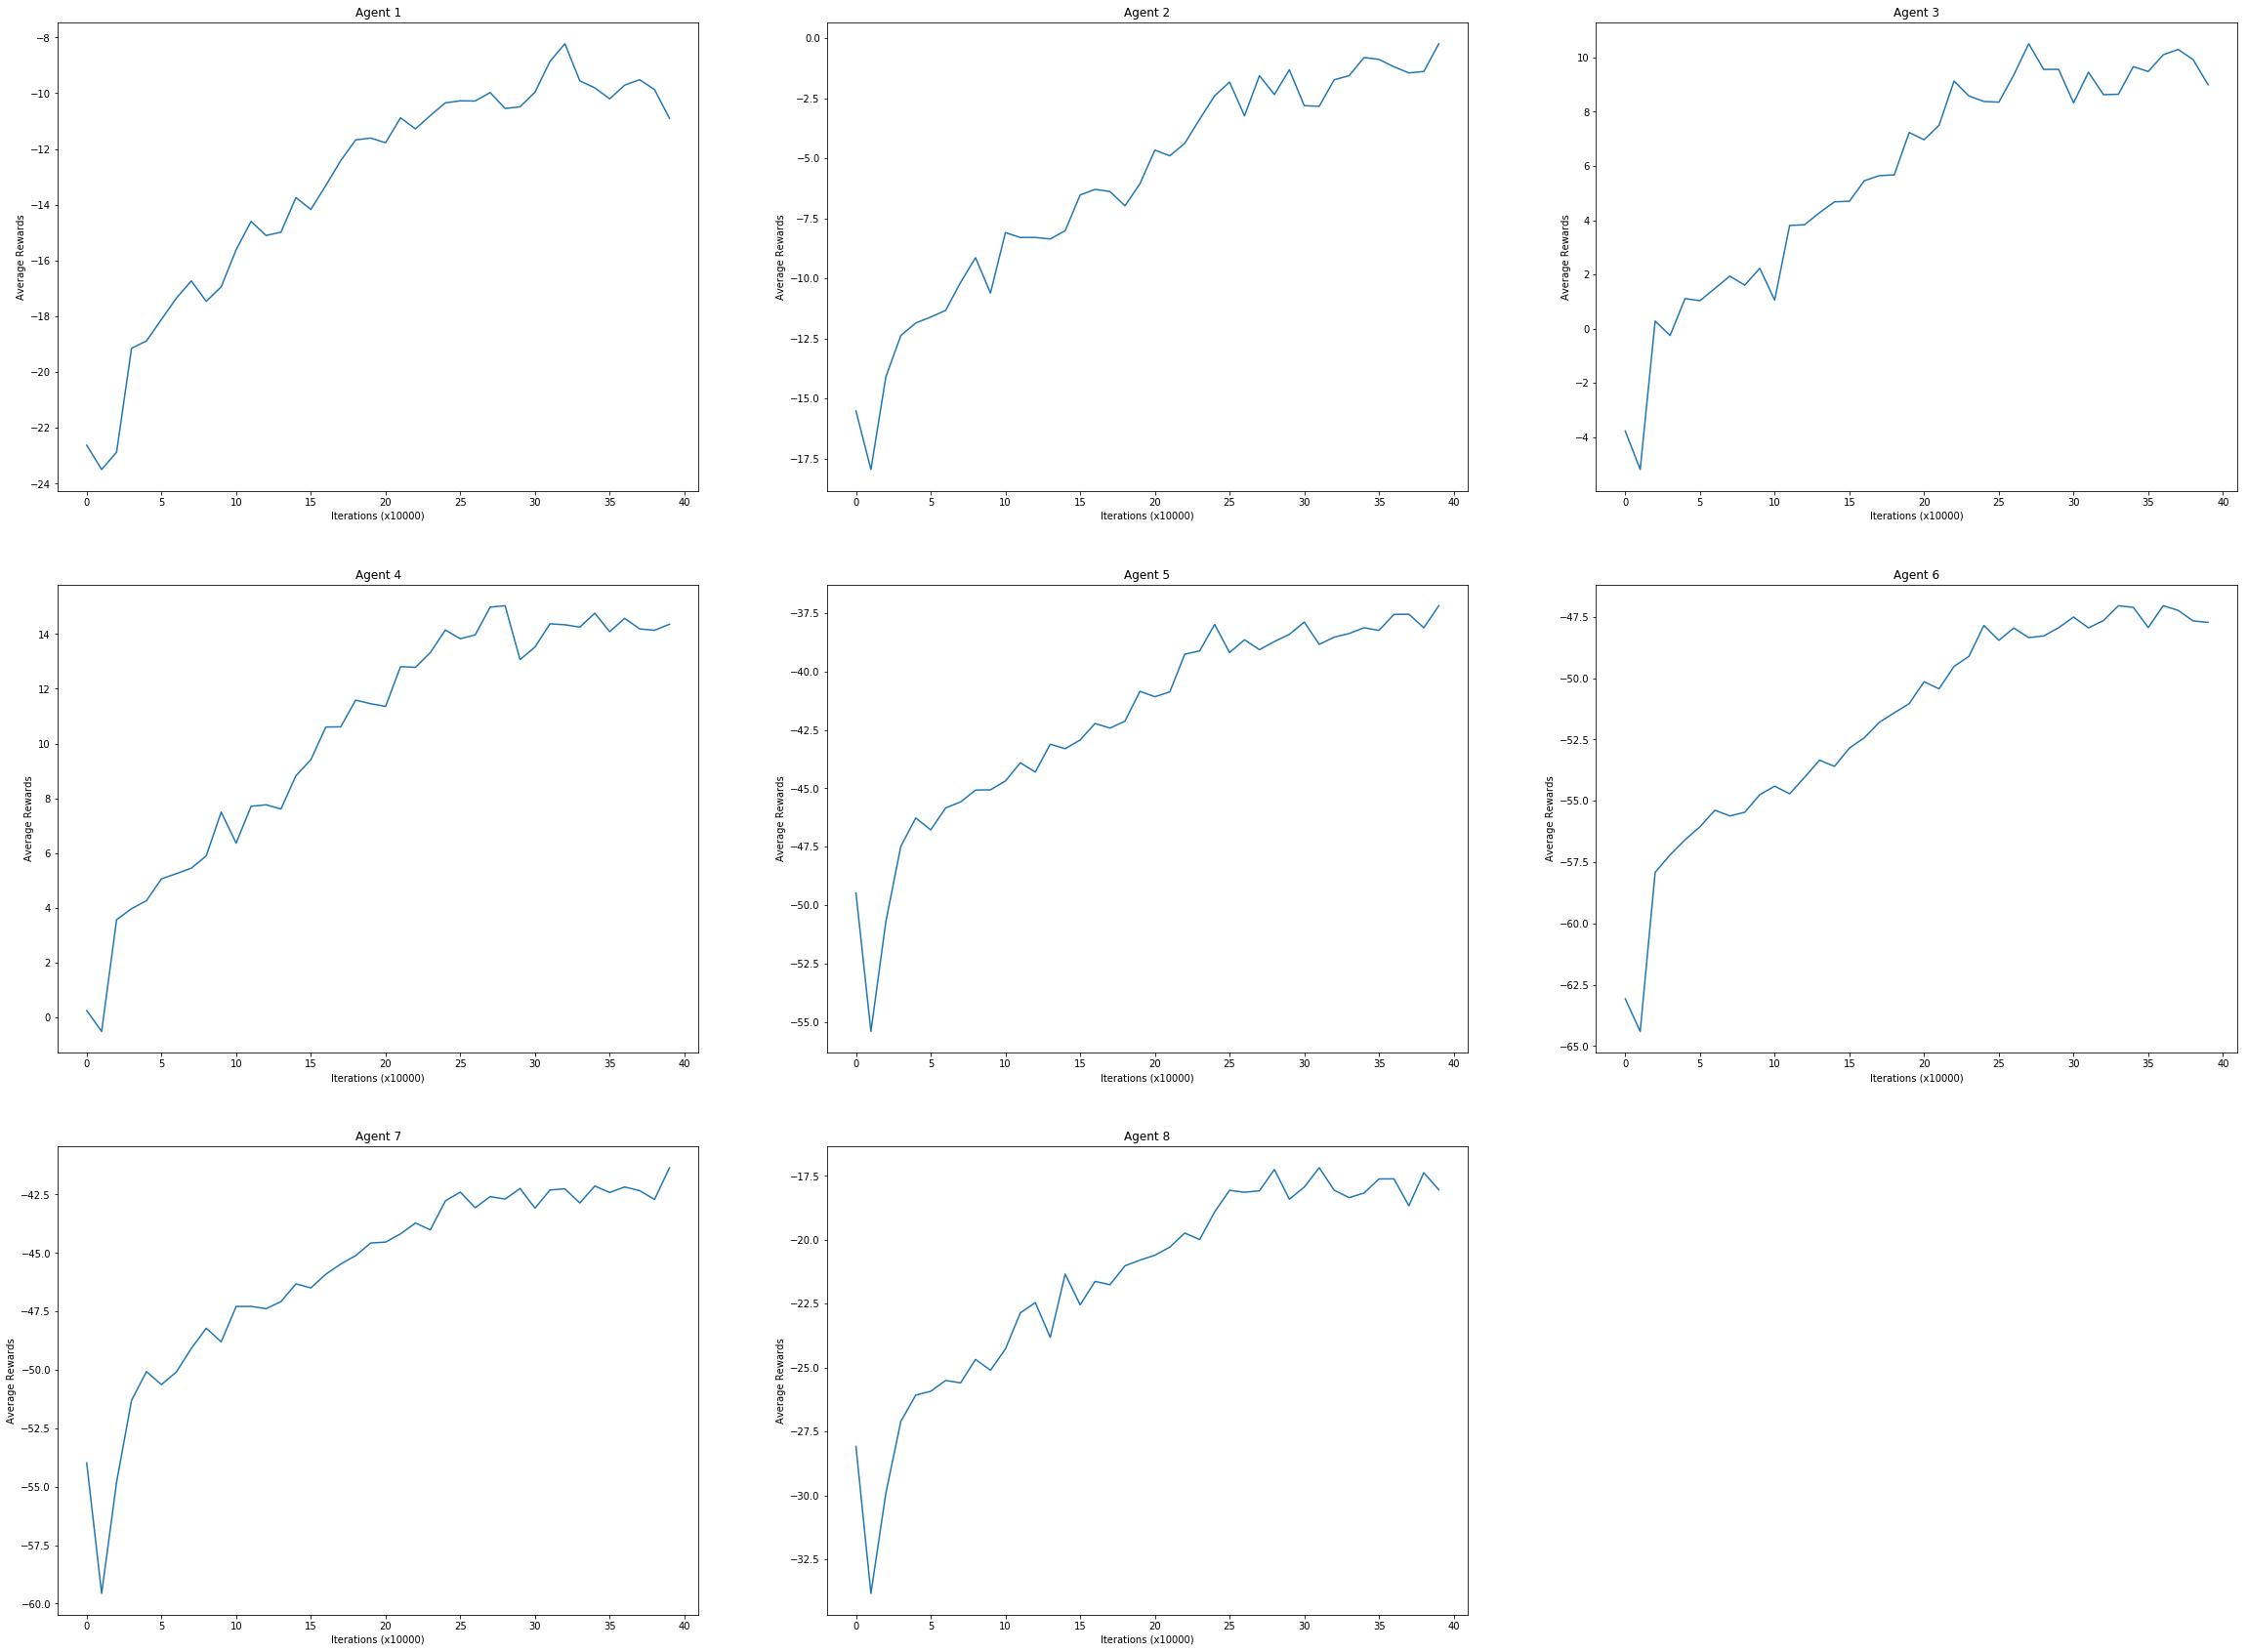

In [11]:
#Plotting 
plt.rcParams["figure.figsize"] = (40,30)

for i in range(num_of_agents):   
    plt.subplot(3, int(math.ceil(num_of_agents/3)), i +1)
    plt.plot(average_rewards_constant[i])
    plt.title('Agent ' + str(i+1))
    plt.xlabel('Iterations (x10000)')
    plt.ylabel('Average Rewards')

plt.show()

### ADL Scheduling 

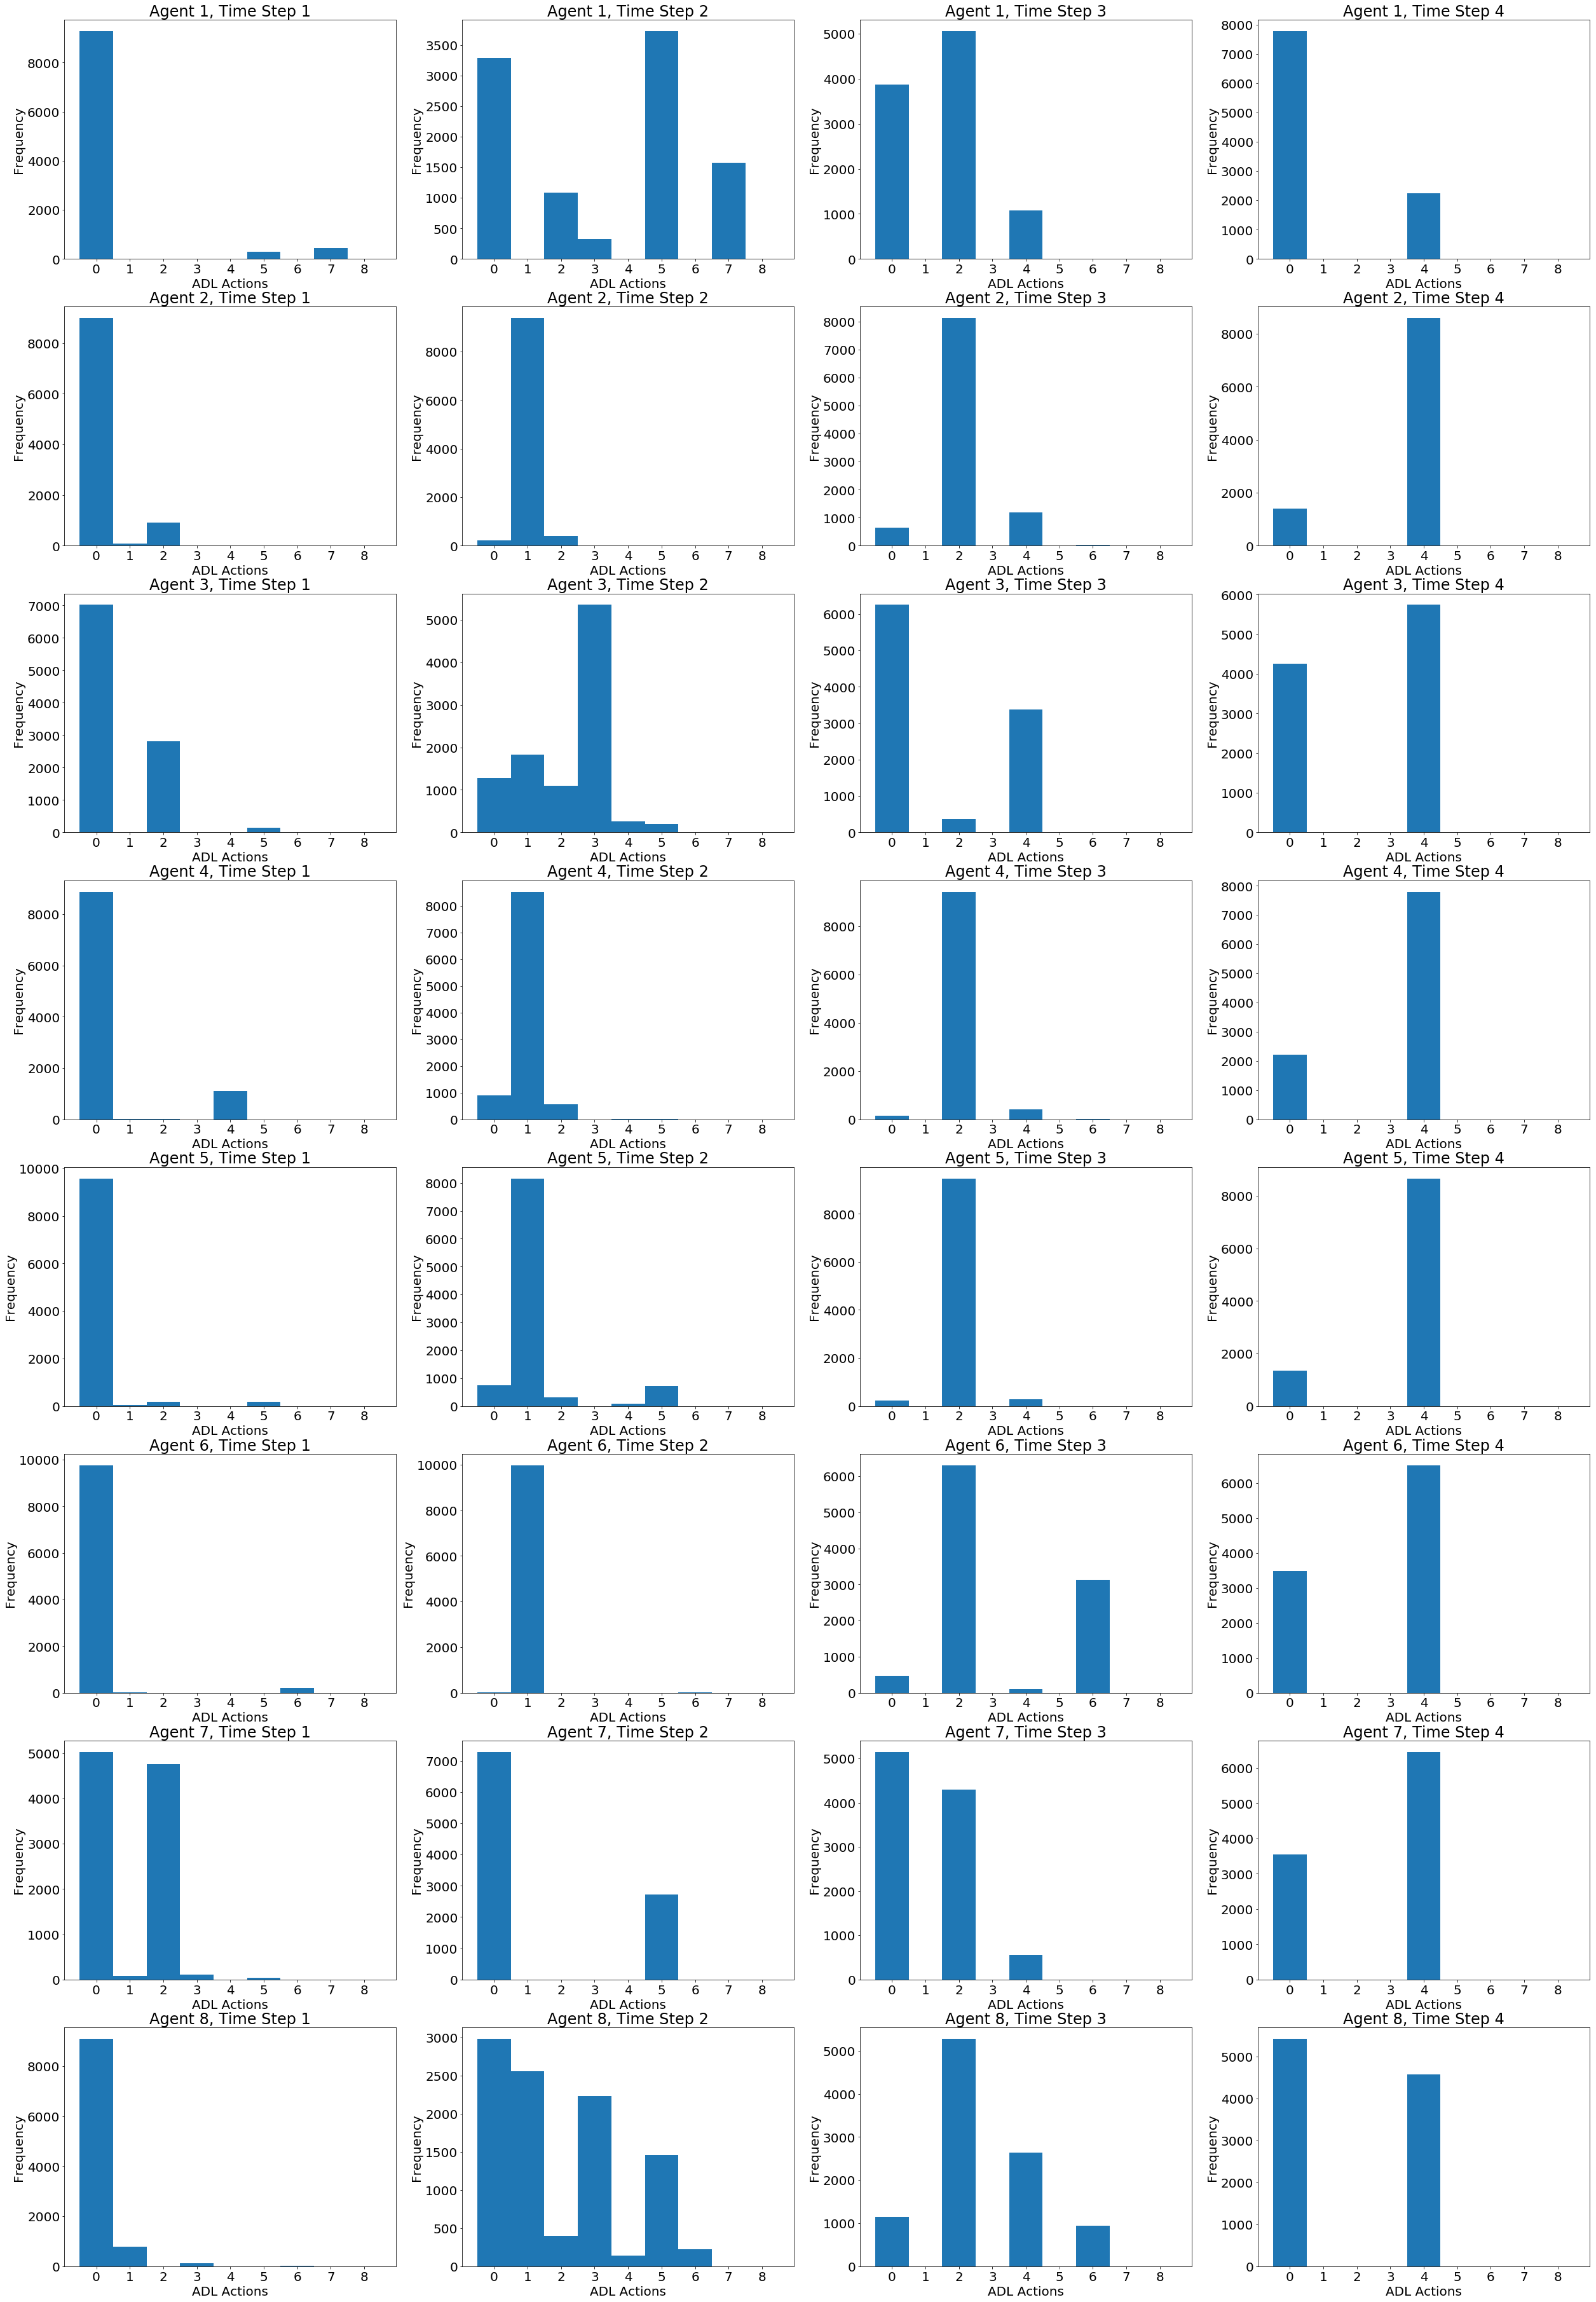

In [12]:
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (43,65)
graph_number = 1
for i in range(num_of_agents):
    for j in range(num_of_time_steps):
            plt.subplot(num_of_agents, num_of_time_steps, graph_number)
            plt.hist(sorted(adl_constant[i][j][-10000:]), bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5])
            plt.title('Agent ' + str(i+1) + ', Time Step ' + str(j+1))
            plt.xlabel('ADL Actions')
            plt.ylabel('Frequency')
            plt.xticks(range(0, 9))
            graph_number +=1
plt.show()


### Dynamic Pricing

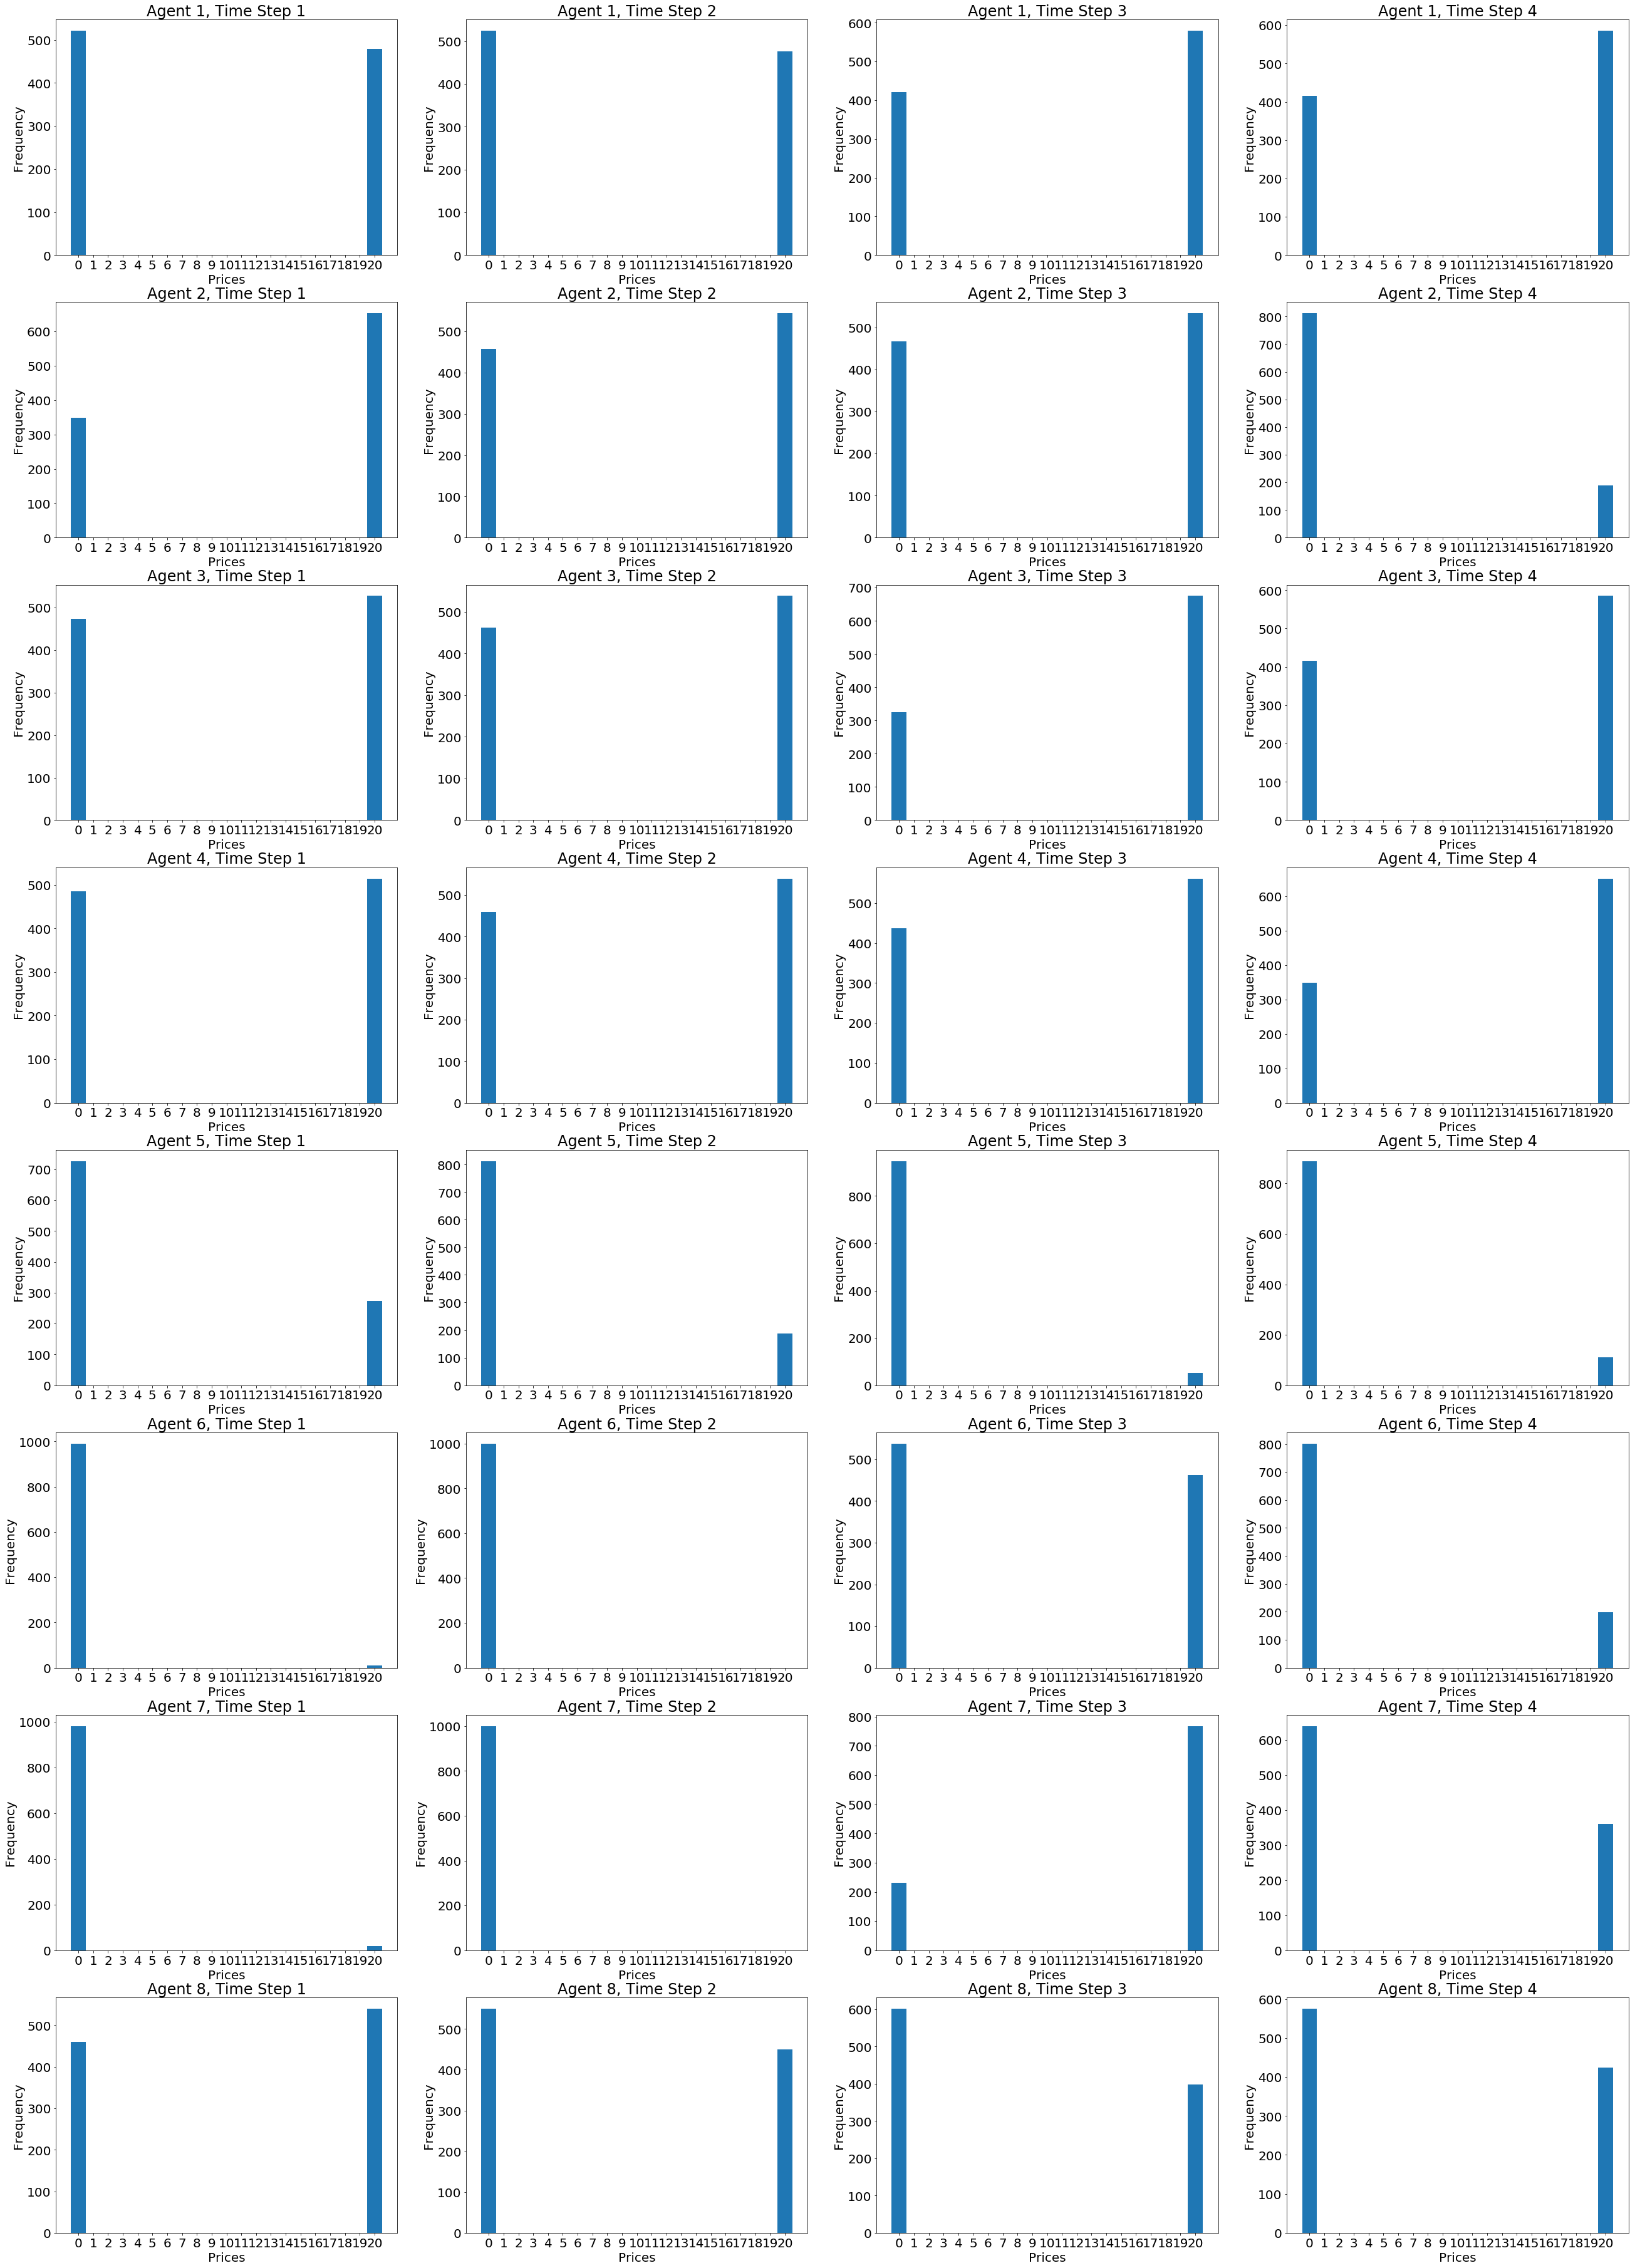

In [13]:
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (45,65)
graph_number = 1
for i in range(num_of_agents):
    for j in range(num_of_time_steps):
            plt.subplot(num_of_agents, num_of_time_steps, graph_number)
            plt.hist(sorted(prices_constant[i][j][-1000:]), bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5])
            plt.title('Agent ' + str(i+1) + ', Time Step ' + str(j+1))
            plt.xlabel('Prices')
            plt.ylabel('Frequency')
            plt.xticks(range(0, 21))
            graph_number +=1

plt.show()

# Dynamic Pricing

# Preprocessing

### Entering the paths of files

In [14]:
adl_log_path_dynamic = './dynamic-pricing/logs/adl_logger.txt'
battery_log_path_dynamic = './dynamic-pricing/logs/battery_logger.txt'
logger_updates_path_dynamic = './dynamic-pricing/logs/logger_updates.txt'
nd_log_path_dynamic = './dynamic-pricing/logs/nd_logger.txt'
prices_log_path_dynamic = './dynamic-pricing/logs/price_logger.txt'
rewards_log_path_dynamic = './dynamic-pricing/logs/reward_logger.txt'
transmission_log_path_dynamic = './dynamic-pricing/logs/transmission_logger.txt'

### Creating the Necessary Variables

In [15]:
# Agent Configurations
num_of_agents = 8
num_of_time_steps = 4

# Agent Lists
adl_dynamic = []
battery_dynamic = []
average_rewards_dynamic = []
nd_dynamic = []
prices_dynamic = []
rewards_dynamic = []
transmission_dynamic = []

for i in range(num_of_agents):
    adl_dynamic.append([])
    battery_dynamic.append([])
    average_rewards_dynamic.append([])
    nd_dynamic.append([])
    prices_dynamic.append([])
    rewards_dynamic.append([])
    transmission_dynamic.append([])
    
for i in range(num_of_agents):
    for j in range(num_of_time_steps):
        adl_dynamic[i].append([])
        battery_dynamic[i].append([])
        nd_dynamic[i].append([])
        prices_dynamic[i].append([])
        rewards_dynamic[i].append([])
        transmission_dynamic[i].append([])

### ADL Scheduling

In [16]:
j = 0
with open(adl_log_path_dynamic,'r') as re:
    for line in re:
        list_ = line.strip().split()
        for i in range(num_of_agents):
            if j == num_of_time_steps:
                j = 0
            adl_dynamic[i][j].append(float(list_[i]))
        j +=1

### Battery

In [17]:
j = 0
with open(battery_log_path_dynamic ,'r') as re:
    for line in re:
        list_ = line.strip().split()
        for i in range(num_of_agents):
            if j == num_of_time_steps:
                j = 0
            battery_dynamic[i][j].append(float(list_[i]))
        j +=1

### ND

In [18]:
j = 0
with open(nd_log_path_dynamic ,'r') as re:
    for line in re:
        list_ = line.strip().split()
        for i in range(num_of_agents):
            if j == num_of_time_steps:
                j = 0
            nd_dynamic[i][j].append(float(list_[i]))
        j +=1

### Prices

In [19]:
j = 0
with open(prices_log_path_dynamic ,'r') as re:
    
    for line in re:
        list_ = line.strip().split()
        for i in range(num_of_agents):
            if j == num_of_time_steps:
                j = 0
            prices_dynamic[i][j].append(float(list_[i]))
        j +=1

### Rewards 

In [20]:
j = 0
with open(rewards_log_path_dynamic ,'r') as re:
    for line in re:
        list_ = line.strip().split()
        for i in range(num_of_agents):
            if j == num_of_time_steps:
                j = 0
            rewards_dynamic[i][j].append(float(list_[i]))
        j +=1

### Transmission Log

In [21]:
j = 0
with open(transmission_log_path_dynamic ,'r') as re:
    for line in re:
        list_ = line.strip().split()
        for i in range(num_of_agents):
            if j == num_of_time_steps:
                j = 0
            transmission_dynamic[i][j].append(float(list_[i]))
        j +=1

### Average Rewards

In [22]:
string = 'reward'
j = 0
with open(logger_updates_path_dynamic ,'r') as re:
    for line in re:
        if j == num_of_agents:
            j = 0
        if string in line:
            list_ = line.strip().split()
            average_rewards_dynamic[j].append(float(list_[(len(list_)) - 1]))
            j+=1

## Graphs

### Convergence of all 8 agents

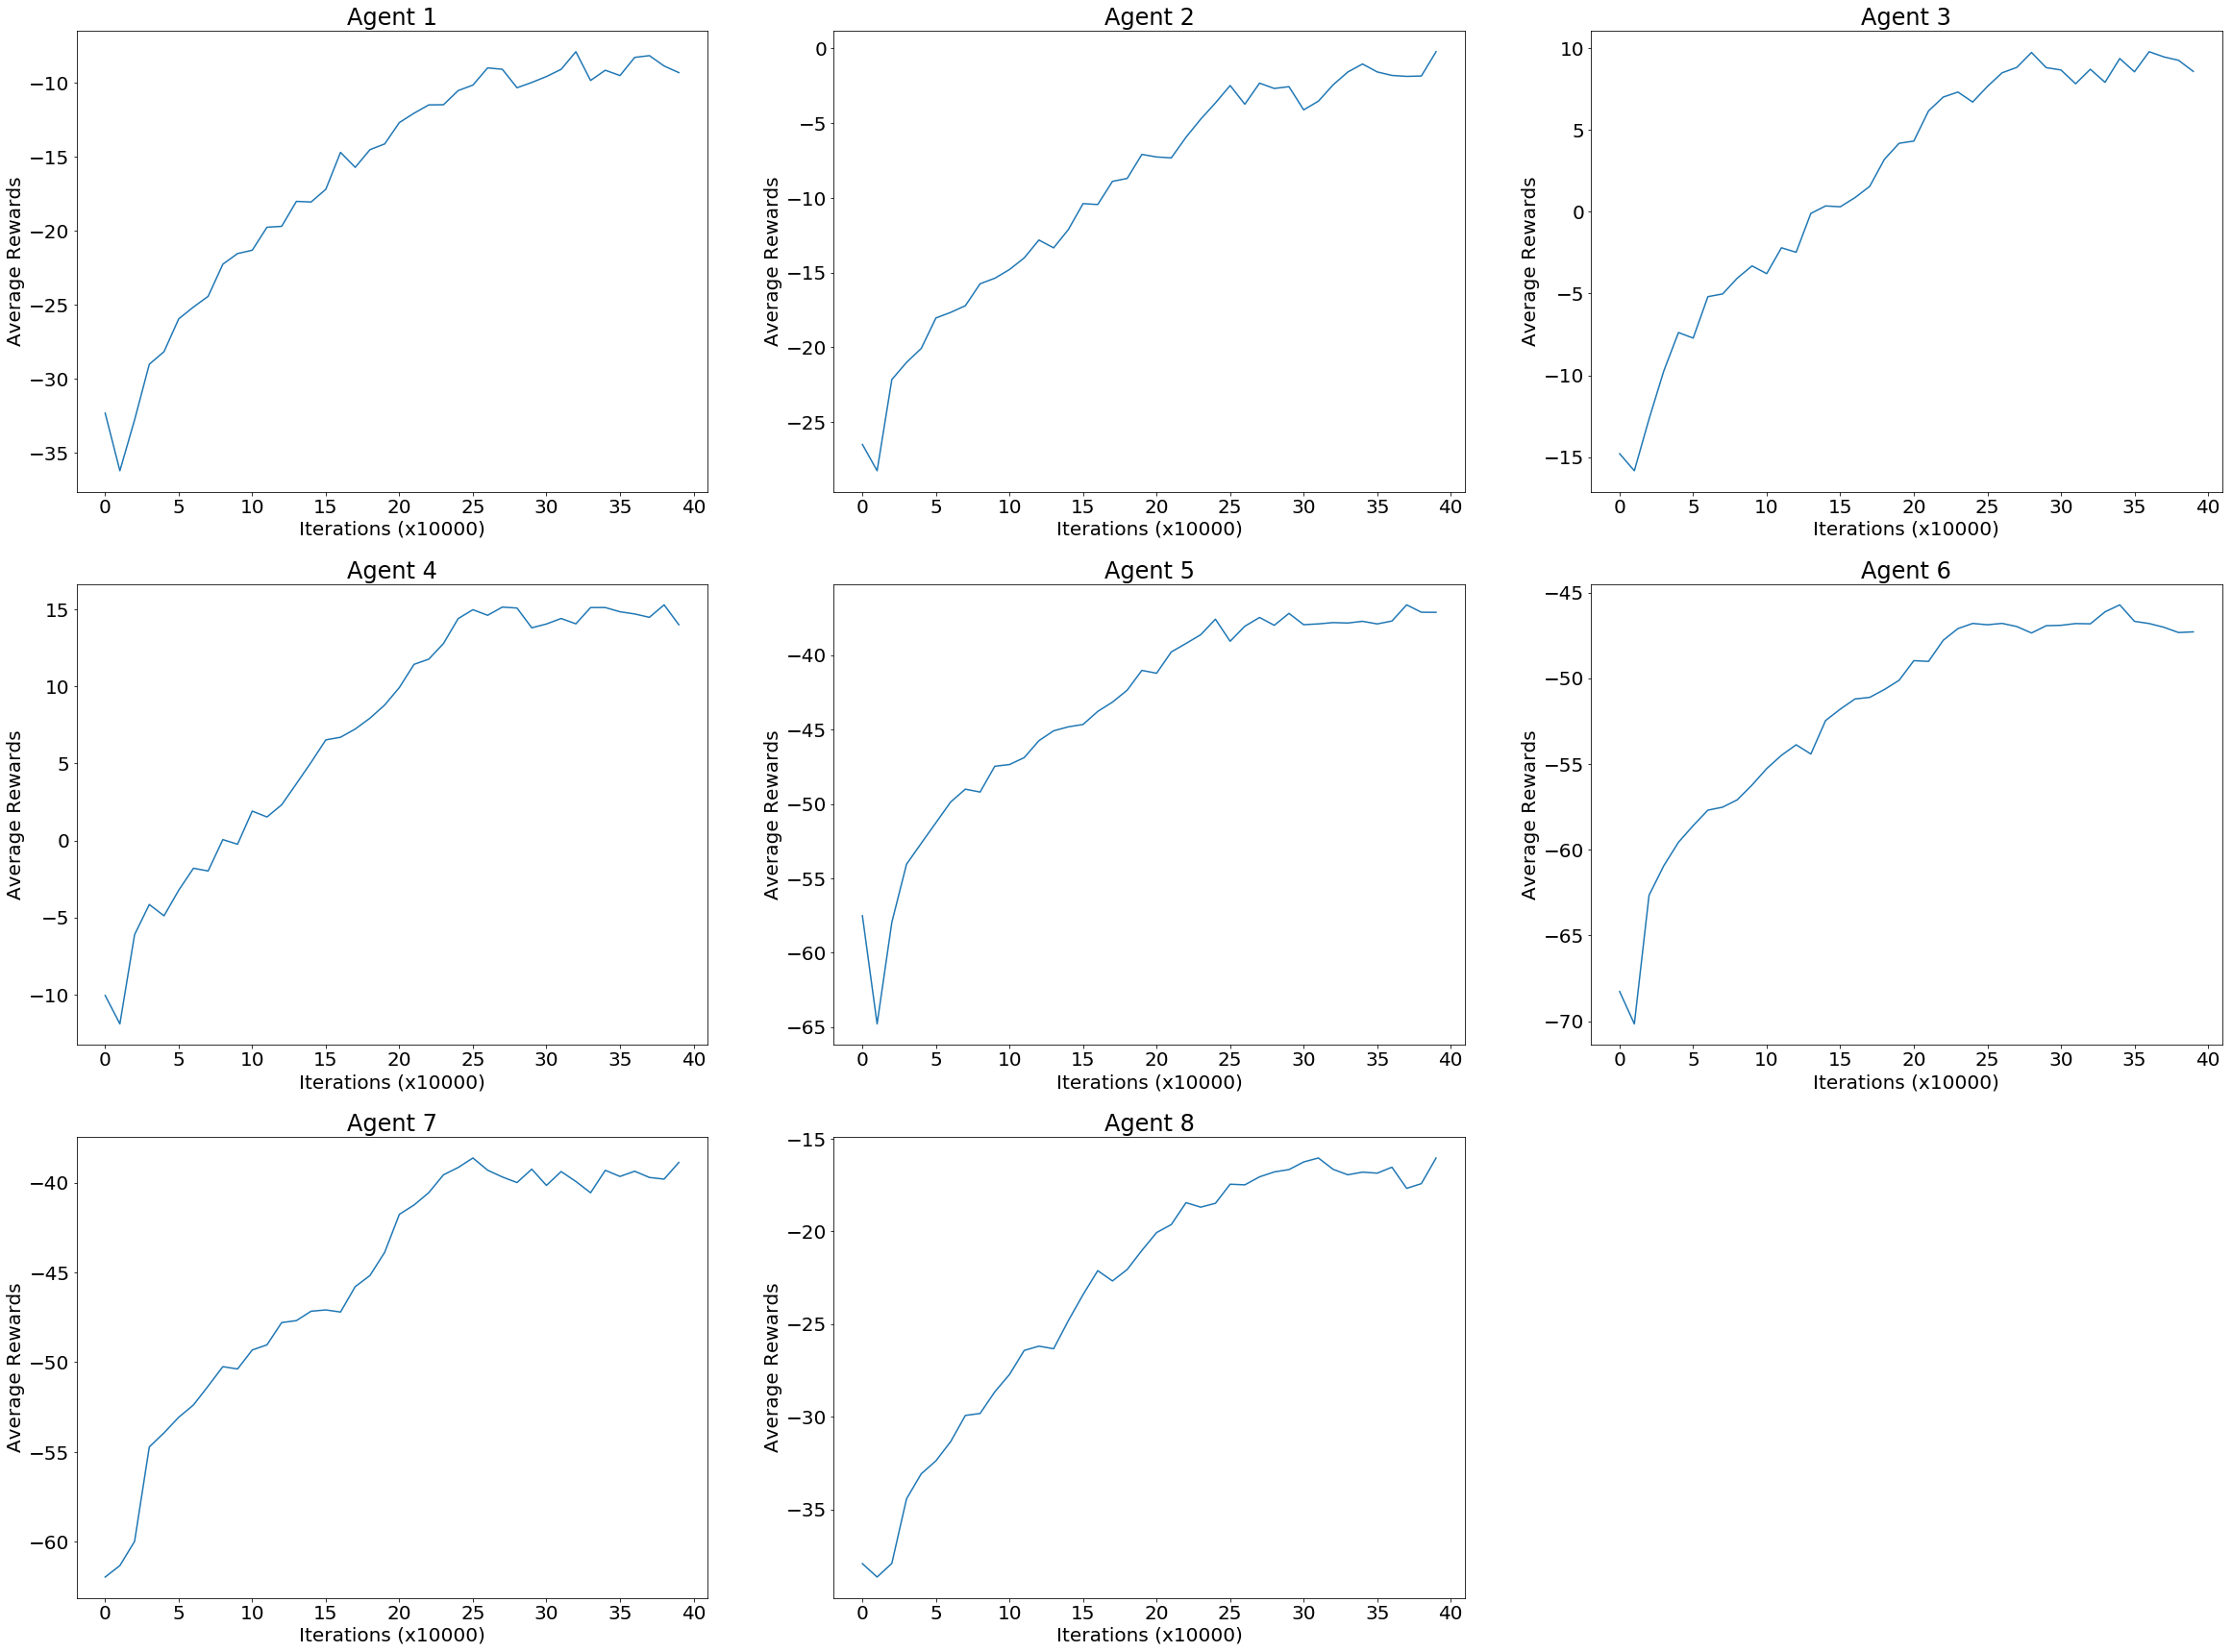

In [23]:
#Plotting 
plt.rcParams["figure.figsize"] = (40,30)

for i in range(num_of_agents):   
    plt.subplot(3, int(math.ceil(num_of_agents/3)), i +1)
    plt.plot(average_rewards_dynamic[i])
    plt.title('Agent ' + str(i+1))
    plt.xlabel('Iterations (x10000)')
    plt.ylabel('Average Rewards')

plt.show()

### ADL Scheduling 

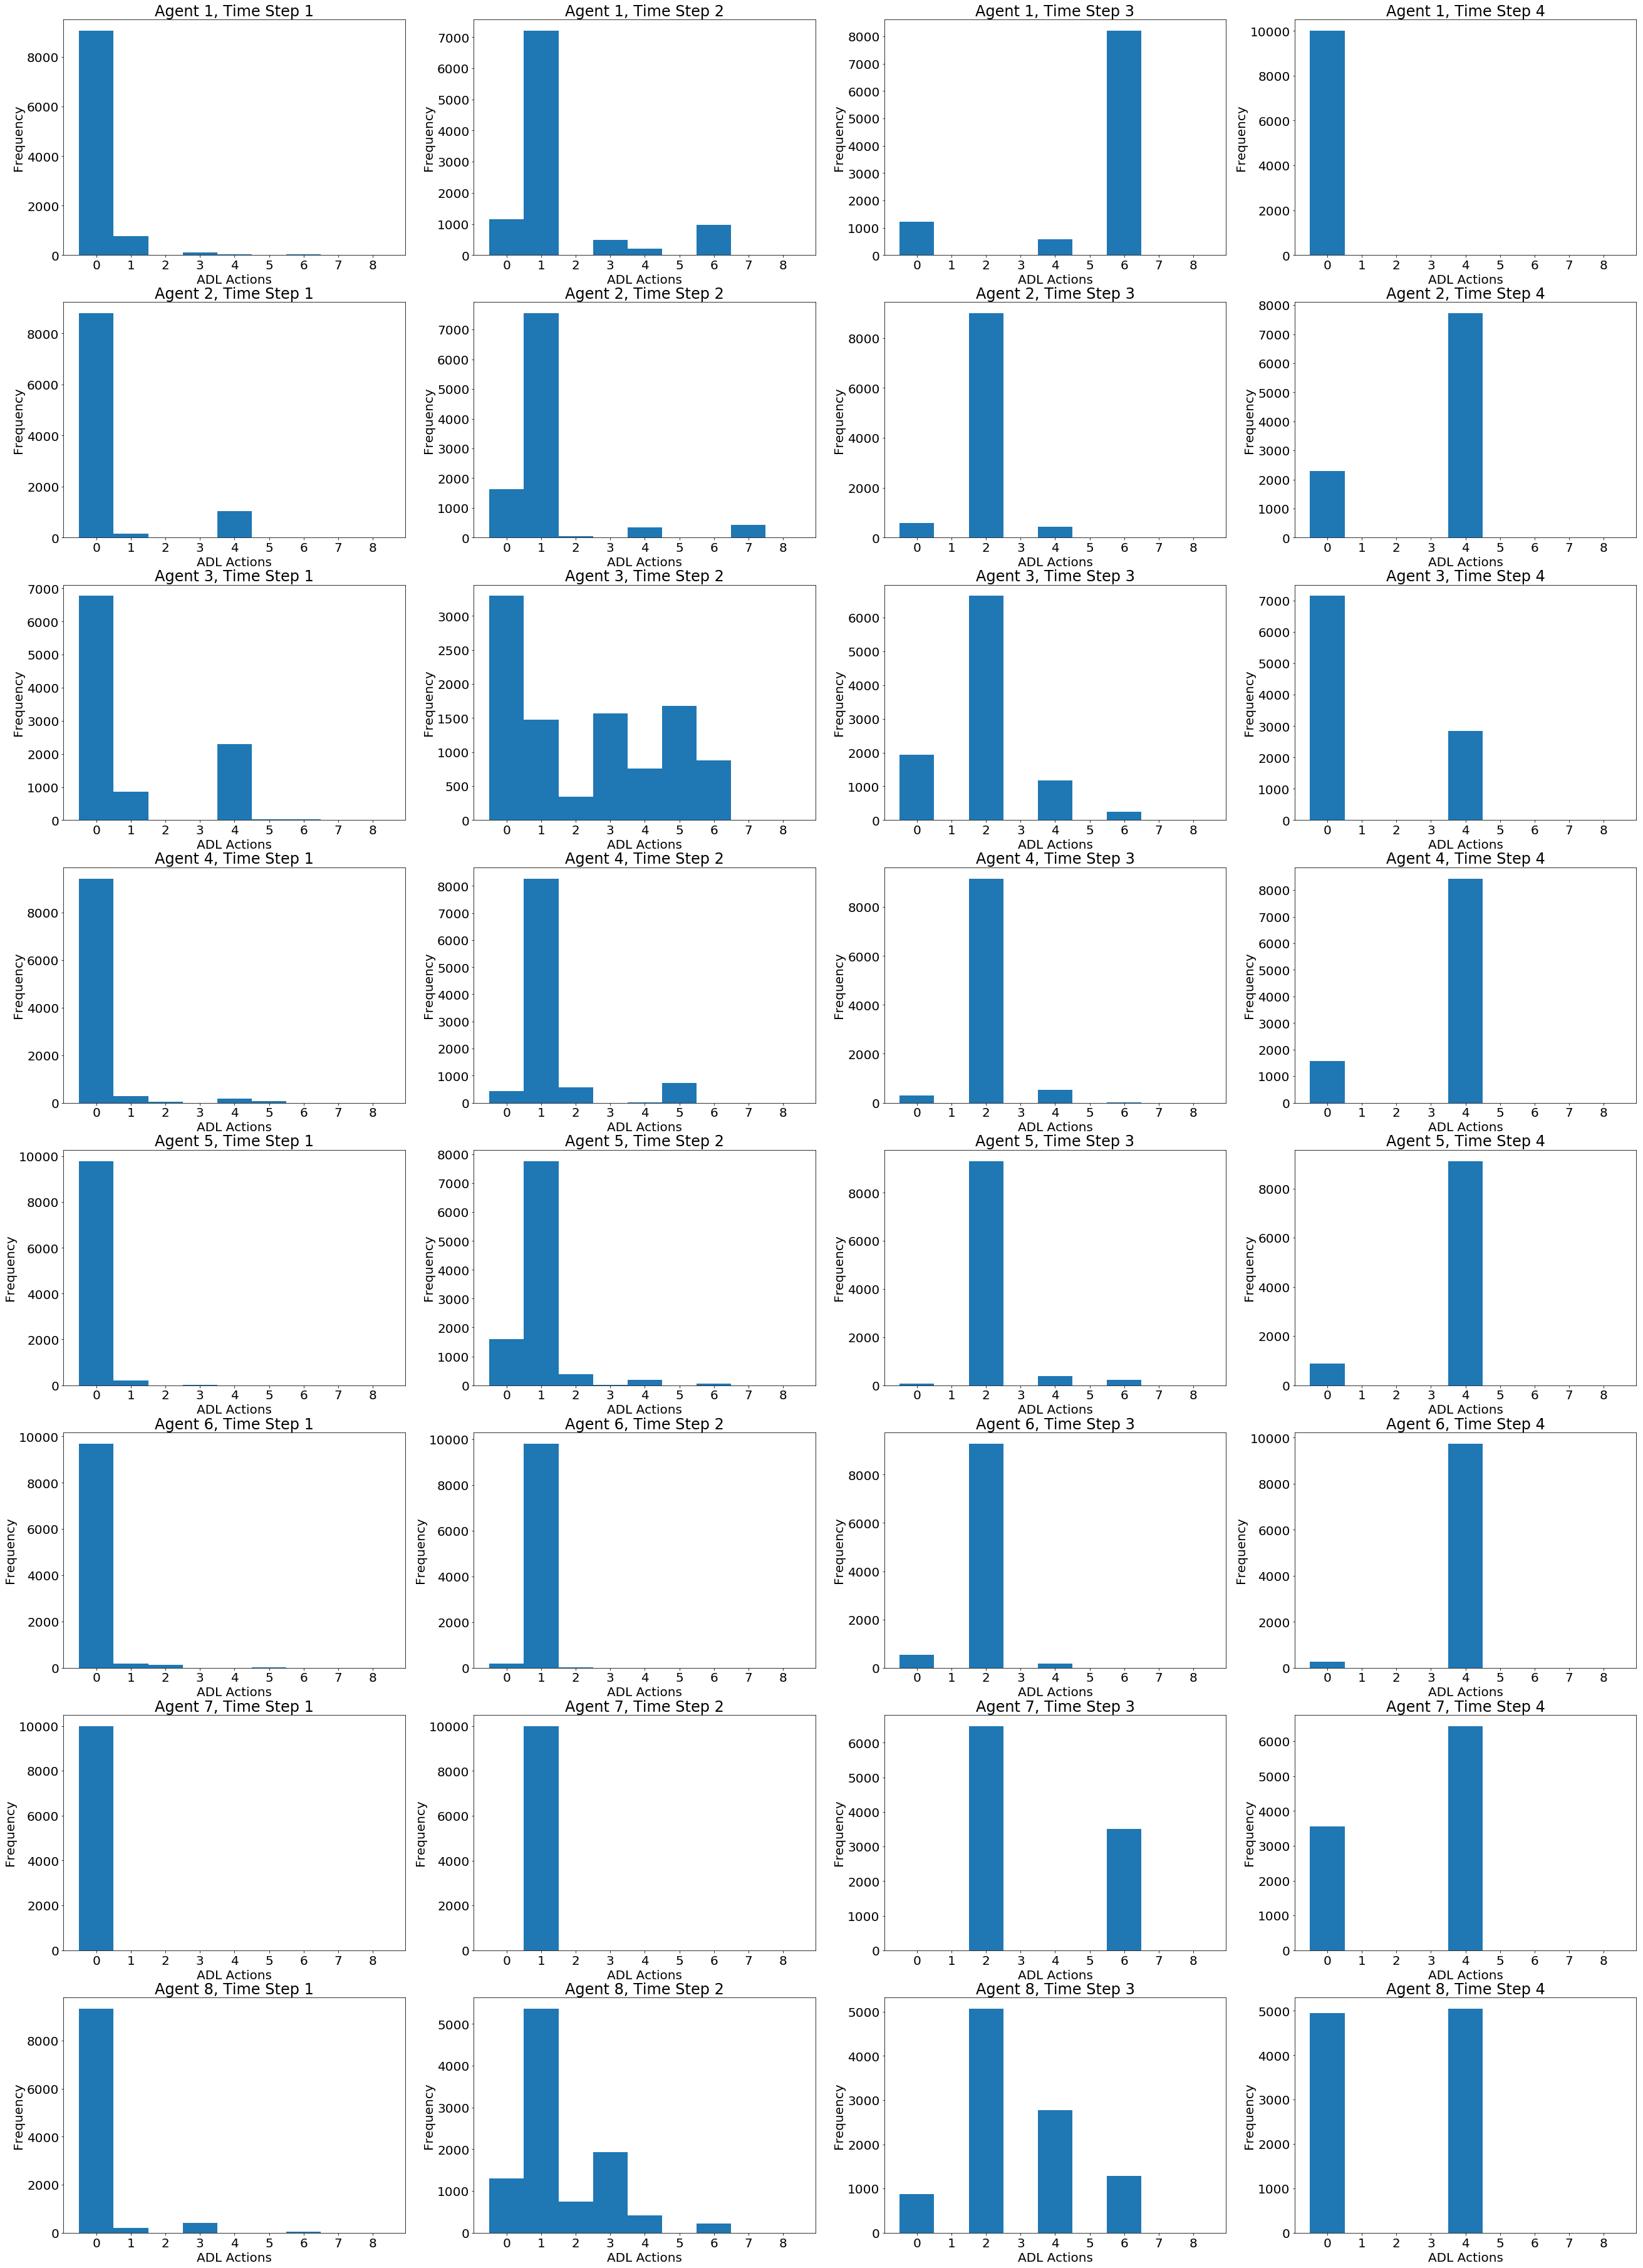

In [24]:
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (45,65)
graph_number = 1
for i in range(num_of_agents):
    for j in range(num_of_time_steps):
            plt.subplot(num_of_agents, num_of_time_steps, graph_number)
            plt.hist(sorted(adl_dynamic[i][j][-10000:]), bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5])
            plt.title('Agent ' + str(i+1) + ', Time Step ' + str(j+1))
            plt.xlabel('ADL Actions')
            plt.ylabel('Frequency')
            plt.xticks(range(0, 9))
            graph_number +=1
plt.show()


### Dynamic Pricing

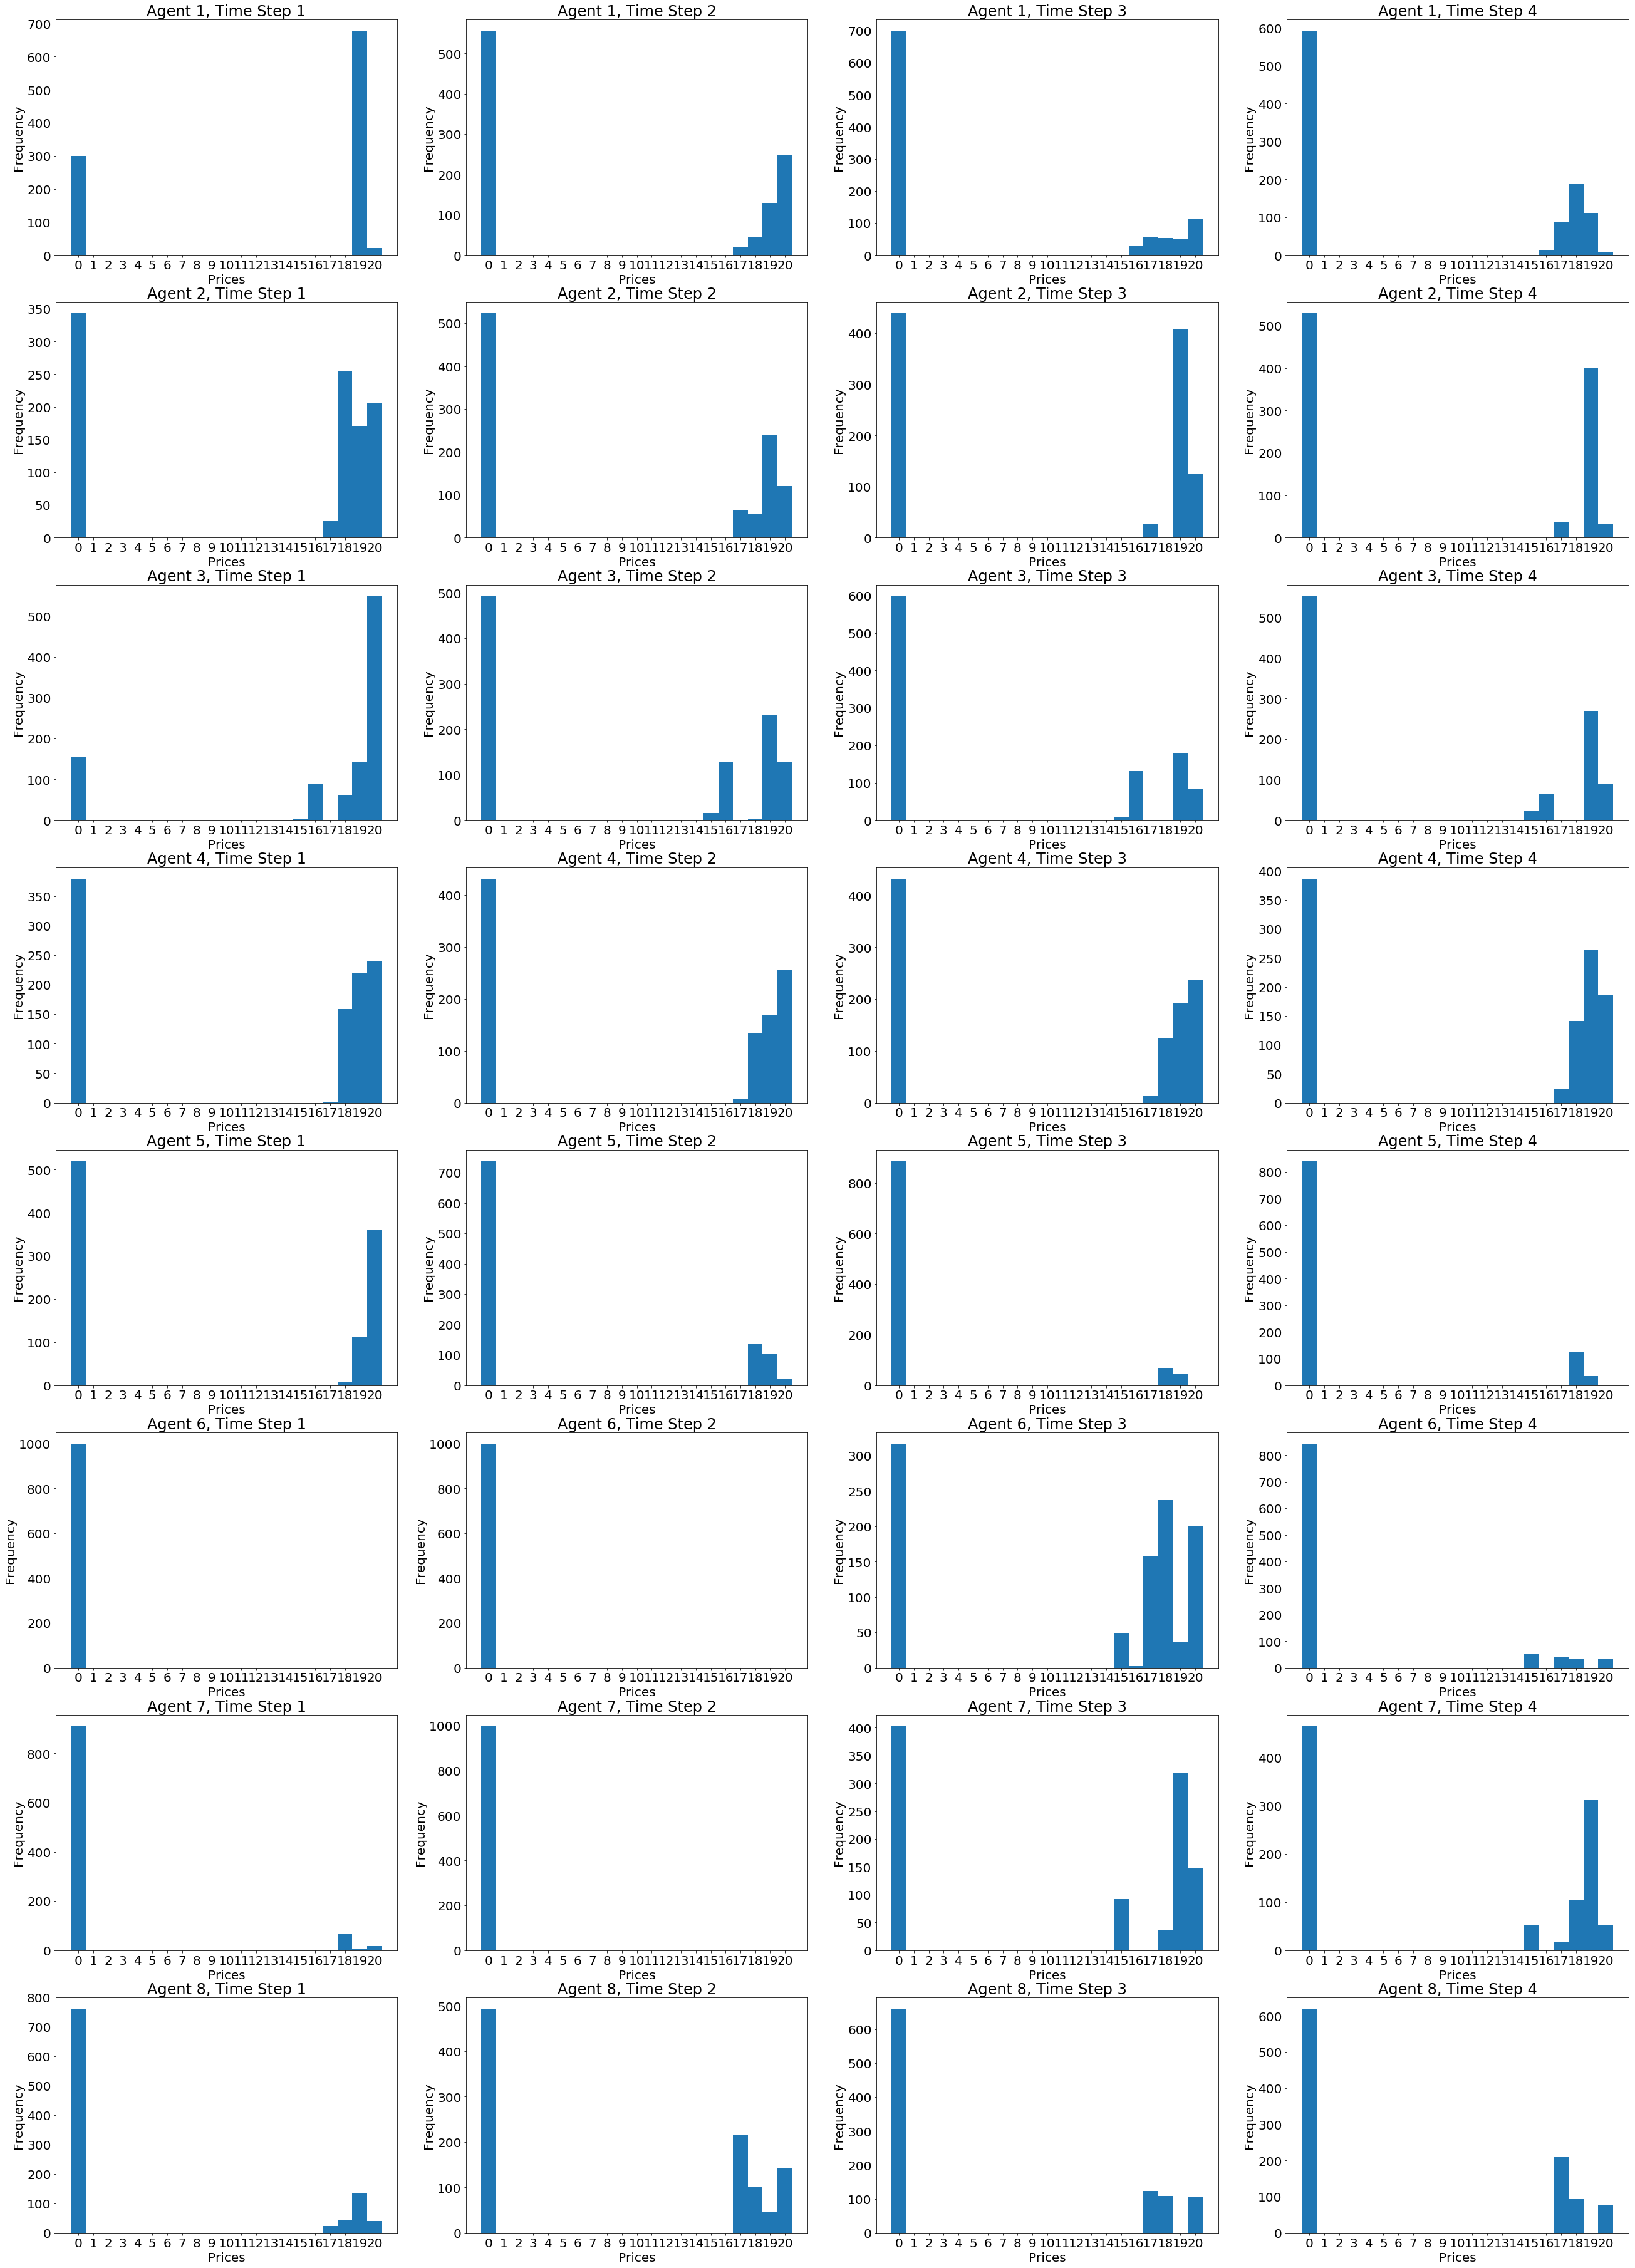

In [25]:
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (45,65)
graph_number = 1
for i in range(num_of_agents):
    for j in range(num_of_time_steps):
            plt.subplot(num_of_agents, num_of_time_steps, graph_number)
            plt.hist(sorted(prices_dynamic[i][j][-1000:]), bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5])
            plt.title('Agent ' + str(i+1) + ', Time Step ' + str(j+1))
            plt.xlabel('Prices')
            plt.ylabel('Frequency')
            plt.xticks(range(0, 21))
            graph_number +=1

plt.show()

# Comparision between Dynamic Pricing and Constant Pricing


### Configuration

### Configuration of Smart Grids (Lambda Values)
- Agent 1 : [5.0672,4.4150,5.0967,5.1631], Total : 19.7420
- Agent 2 : [4.5686,4.9671,4.9942,4.6172], Total : 19.1471
- Agent 3 : [3.3972,3.6215,3.3983,4.4020], Total : 14.8189
- Agent 4 : [2.6044,2.4534,3.6837,2.6472], Total : 11.3887
- Agent 5 : [0.0201,1.7532,7.8576,3.6710], Total : 13.3020
- Agent 6 : [ 0,0.7350,8.6901,5.7239], Total = 15.1490
- Agent 7 : [0.0000,0.5410,6.5965,4.3712], Total = 11.5086
- Agent 8 : [0,0.0000,6.0057,3.6077], Total = 9.6134

## Random Generation

In [26]:
average_rewards_random = []
average_rewards_random_path = './random-exploration/logs/logger_updates.txt'
for i in range(num_of_agents):
    average_rewards_random.append([])   

In [27]:
string = 'reward'
j = 0
with open(average_rewards_random_path ,'r') as re:
    for line in re:
        if j == num_of_agents:
            j = 0
        if string in line:
            list_ = line.strip().split()
            average_rewards_random[j].append(float(list_[(len(list_)) - 1]))
            j+=1

### Graphs

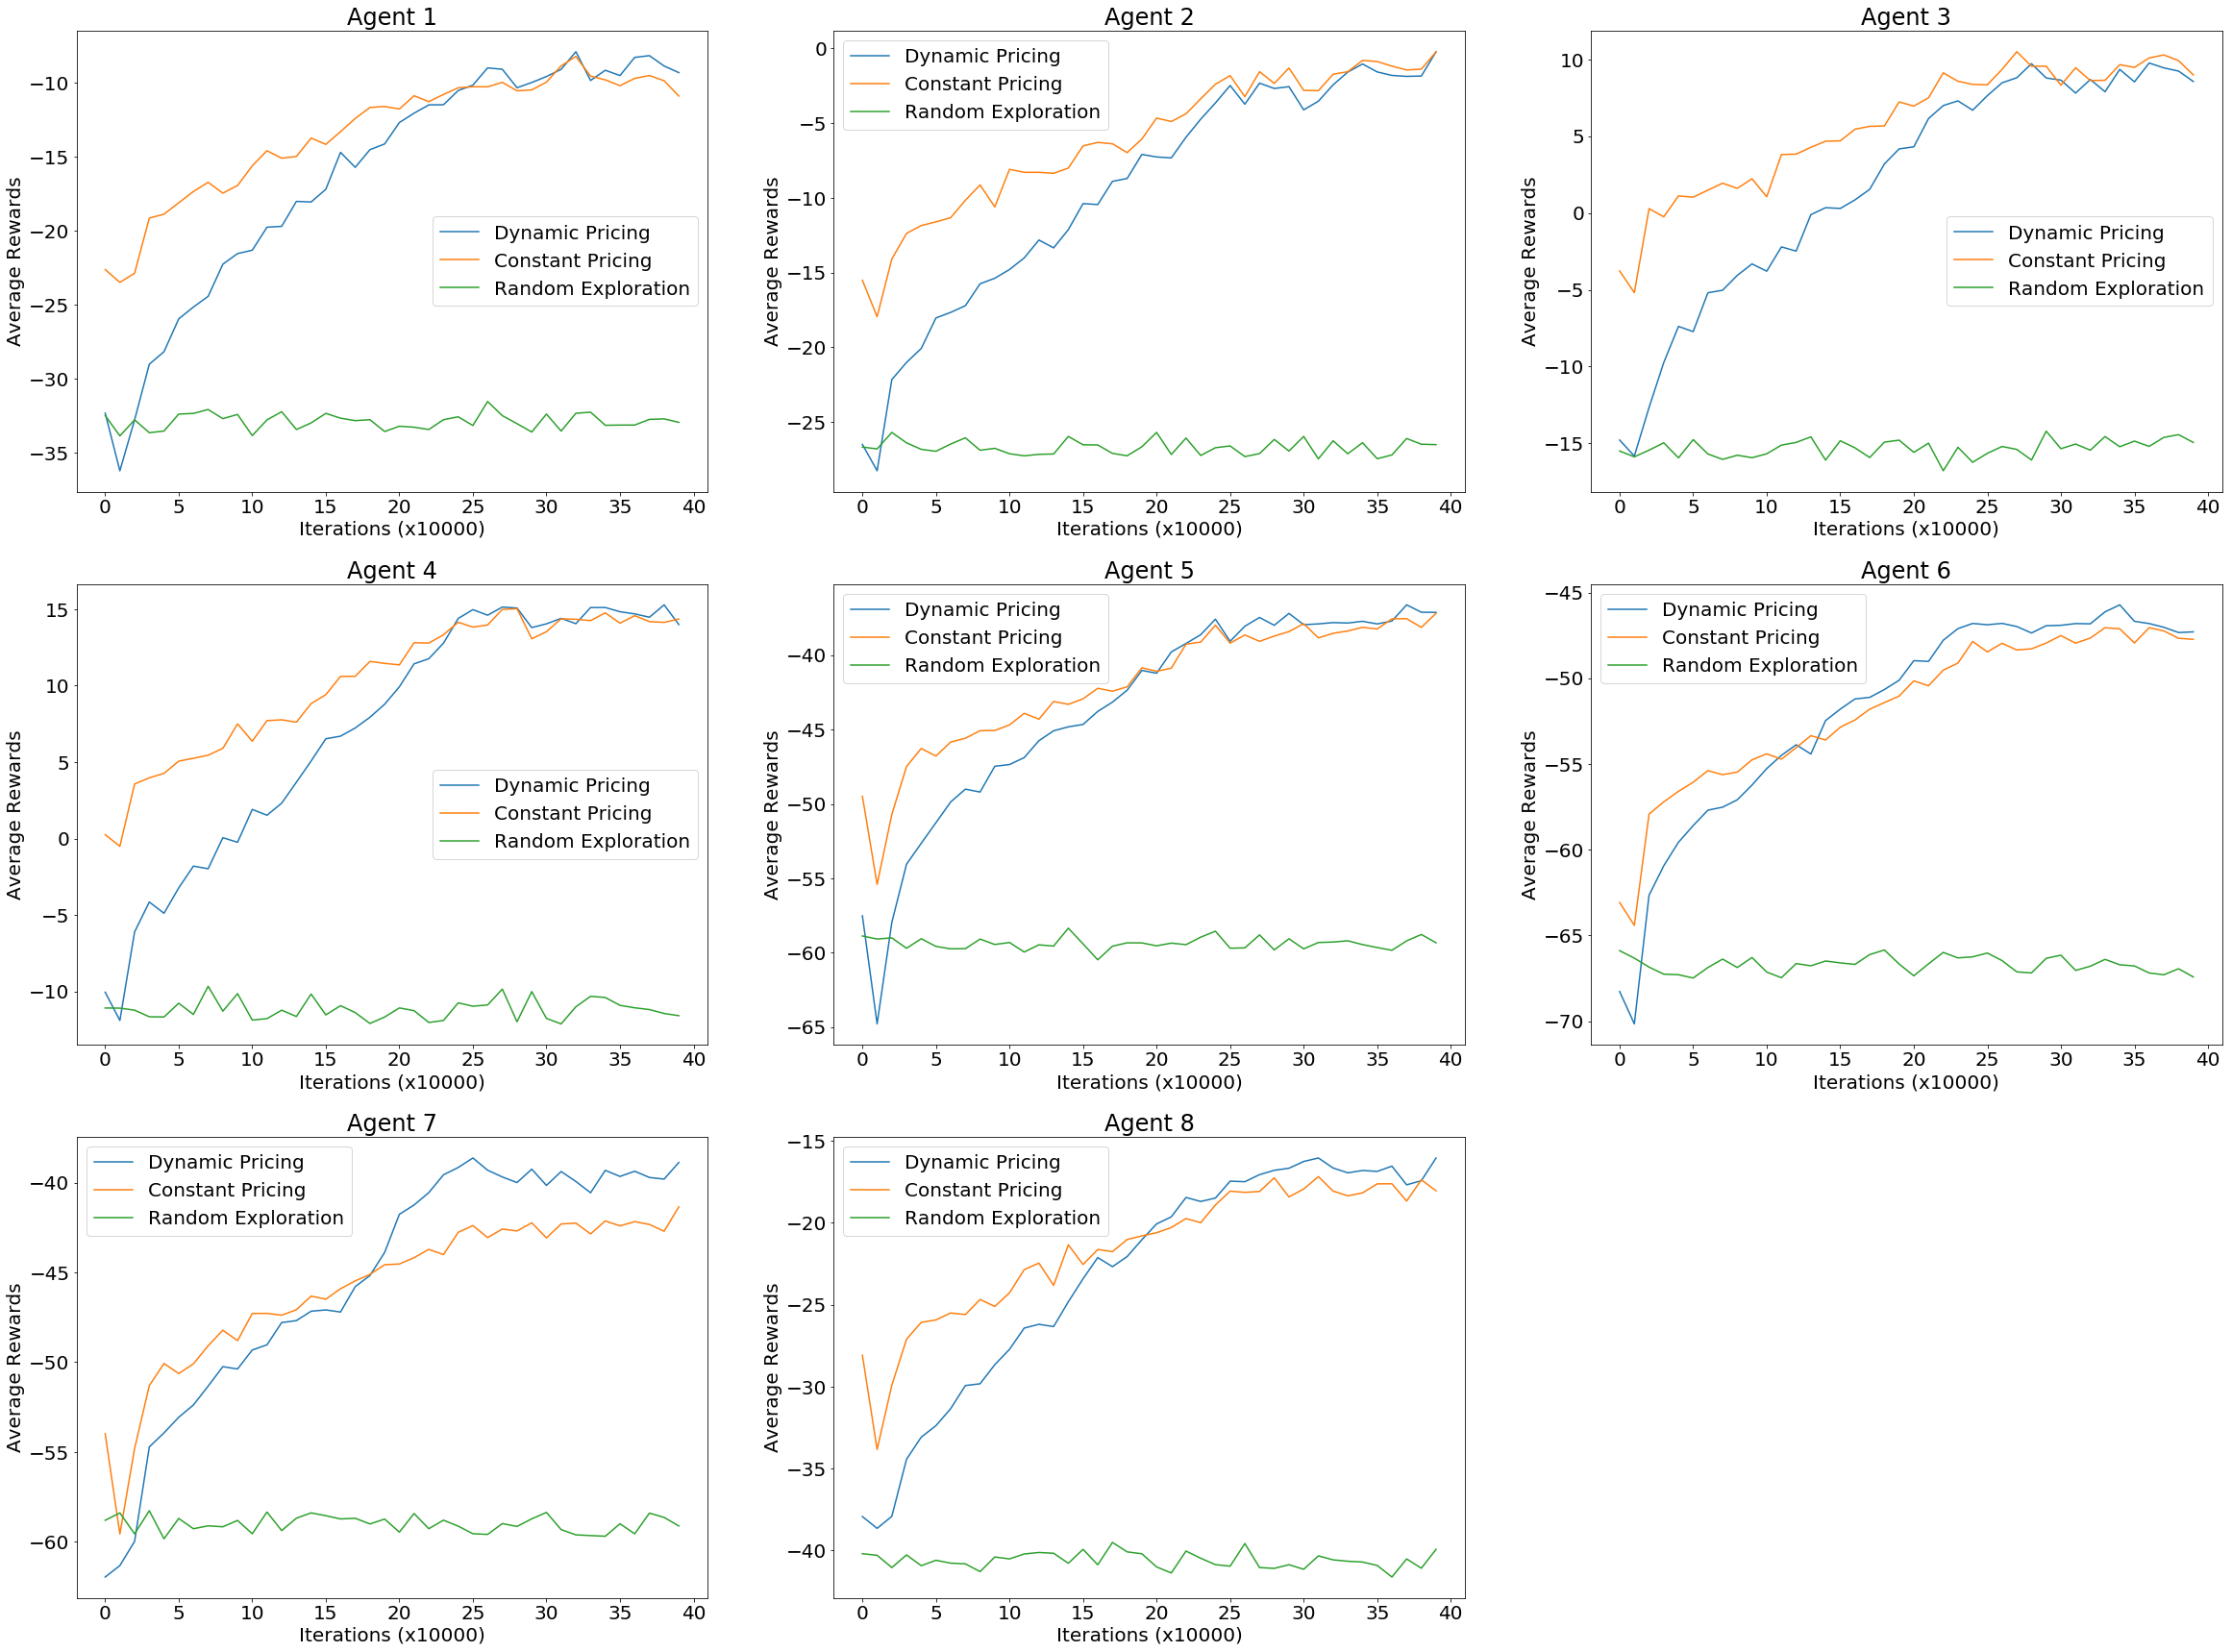

In [28]:
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (40,30)

for i in range(num_of_agents):   
    plt.subplot(3, int(math.ceil(num_of_agents/3)), i +1)
    plt.plot(average_rewards_dynamic[i], label = 'Dynamic Pricing')
    plt.plot(average_rewards_constant[i], label = 'Constant Pricing')
    plt.plot(average_rewards_random[i], label = 'Random Exploration')
    plt.title('Agent ' + str(i+1))
    plt.xlabel('Iterations (x10000)')
    plt.ylabel('Average Rewards')
    plt.legend()

plt.show()

### Reward Averaged over last 50,000 Iterations

In [29]:
count = 0
for i in range(num_of_agents):
    dynamic_pricing_average = np.mean(average_rewards_dynamic[i][-5:])
    constant_pricing_average = np.mean(average_rewards_constant[i][-5:])
    print('Agent:', i+1, ',Dynamic Pricing:', dynamic_pricing_average, ',Constant Pricing:', constant_pricing_average,',Difference:', round(dynamic_pricing_average - constant_pricing_average, 6))
    if dynamic_pricing_average > constant_pricing_average:
        count += 1 
print('Number of Dynamic Pricing Microgrids that perform better than Constant Pricing Microgrids:', count)

Agent: 1 ,Dynamic Pricing: -8.83435539350173 ,Constant Pricing: -10.039375981840157 ,Difference: 1.205021
Agent: 2 ,Dynamic Pricing: -1.472799838056011 ,Constant Pricing: -1.0327087217925661 ,Difference: -0.440091
Agent: 3 ,Dynamic Pricing: 9.111363090013858 ,Constant Pricing: 9.755353878675898 ,Difference: -0.643991
Agent: 4 ,Dynamic Pricing: 14.6547319652982 ,Constant Pricing: 14.267486672175826 ,Difference: 0.387245
Agent: 5 ,Dynamic Pricing: -37.288613443885616 ,Constant Pricing: -37.72918677311683 ,Difference: 0.440573
Agent: 6 ,Dynamic Pricing: -47.02739790023871 ,Constant Pricing: -47.52489879876248 ,Difference: 0.497501
Agent: 7 ,Dynamic Pricing: -39.486664274886664 ,Constant Pricing: -42.19527001989112 ,Difference: 2.708606
Agent: 8 ,Dynamic Pricing: -16.909464204743365 ,Constant Pricing: -17.864700255448614 ,Difference: 0.955236
Number of Dynamic Pricing Microgrids that perform better than Constant Pricing Microgrids: 6


### Frequency of Selling

In [30]:
for i in range(num_of_agents):
    print('Agent:', i + 1)
    for j in range(num_of_time_steps):
        print('Time Step', j + 1,':', 'Constant:', np.sum(np.array(prices_constant[i][j][-1000:]) > 0), end = ' ')
        print('Dynamic:', np.sum(np.array(prices_dynamic[i][j][-1000:]) > 0), end = ' | ')
        print('15:', np.sum(np.array(prices_dynamic[i][j][-1000:]) == 15), end = ' | ')
        print('16:', np.sum(np.array(prices_dynamic[i][j][-1000:]) == 16), end = ' | ')
        print('17:', np.sum(np.array(prices_dynamic[i][j][-1000:]) == 17), end = ' | ')
        print('18:', np.sum(np.array(prices_dynamic[i][j][-1000:]) == 18), end = ' | ')
        print('19:', np.sum(np.array(prices_dynamic[i][j][-1000:]) == 19), end = ' | ')
        print('20:', np.sum(np.array(prices_dynamic[i][j][-1000:]) == 20))
    print('-----------------------------------------------------------------------------------------------')

Agent: 1
Time Step 1 : Constant: 479 Dynamic: 700 | 15: 0 | 16: 0 | 17: 0 | 18: 0 | 19: 678 | 20: 22
Time Step 2 : Constant: 476 Dynamic: 444 | 15: 0 | 16: 1 | 17: 21 | 18: 45 | 19: 129 | 20: 248
Time Step 3 : Constant: 579 Dynamic: 301 | 15: 0 | 16: 29 | 17: 55 | 18: 53 | 19: 51 | 20: 113
Time Step 4 : Constant: 585 Dynamic: 408 | 15: 0 | 16: 14 | 17: 86 | 18: 189 | 19: 112 | 20: 7
-----------------------------------------------------------------------------------------------
Agent: 2
Time Step 1 : Constant: 652 Dynamic: 657 | 15: 0 | 16: 0 | 17: 25 | 18: 255 | 19: 171 | 20: 206
Time Step 2 : Constant: 543 Dynamic: 477 | 15: 0 | 16: 0 | 17: 63 | 18: 55 | 19: 239 | 20: 120
Time Step 3 : Constant: 533 Dynamic: 561 | 15: 0 | 16: 0 | 17: 28 | 18: 2 | 19: 407 | 20: 124
Time Step 4 : Constant: 189 Dynamic: 471 | 15: 0 | 16: 0 | 17: 38 | 18: 0 | 19: 400 | 20: 33
-----------------------------------------------------------------------------------------------
Agent: 3
Time Step 1 : Constant: 52

### Pricing Comparision

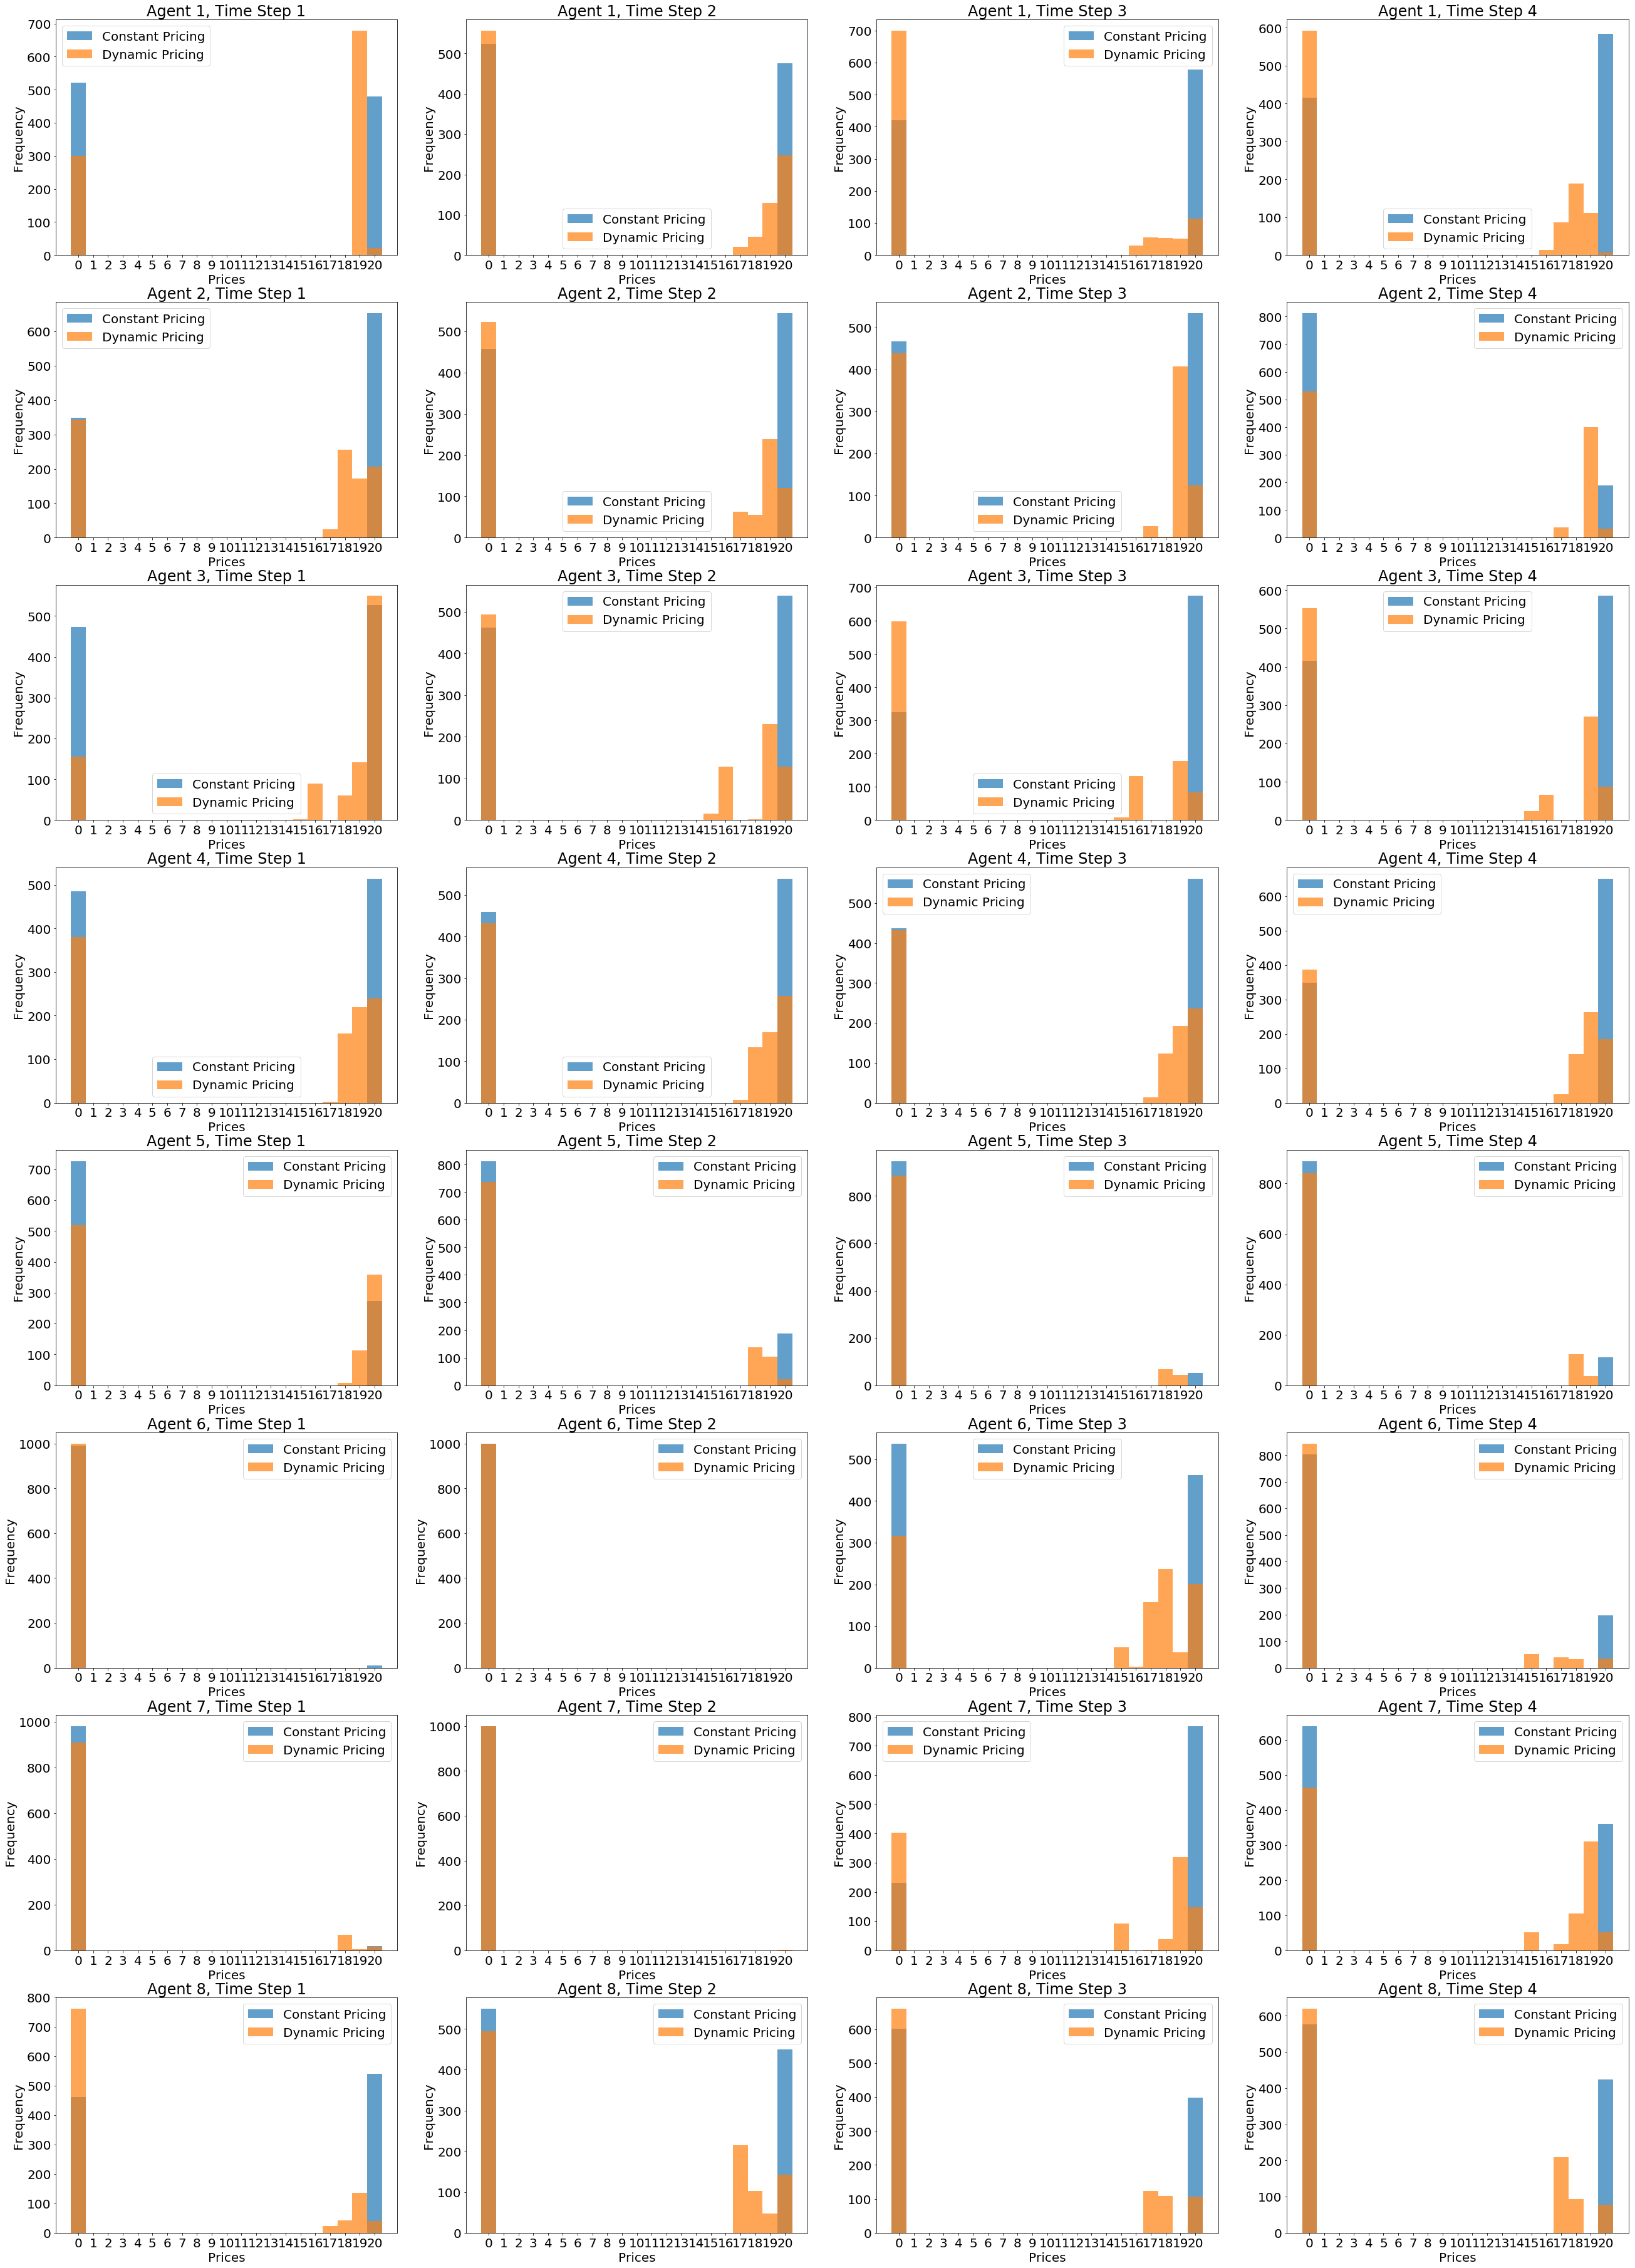

In [31]:
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (45,65)
graph_number = 1
for i in range(num_of_agents):
    for j in range(num_of_time_steps):
            plt.subplot(num_of_agents, num_of_time_steps, graph_number)
            plt.hist(sorted(prices_constant[i][j][-1000:]), bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5],  alpha = 0.7, label = 'Constant Pricing')
            plt.hist(sorted(prices_dynamic[i][j][-1000:]), bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5], alpha = 0.7, label = 'Dynamic Pricing')
            plt.title('Agent ' + str(i+1) + ', Time Step ' + str(j+1))
            plt.xlabel('Prices')
            plt.ylabel('Frequency')
            plt.xticks(range(0, 21))
            plt.legend()
            graph_number +=1

plt.show()
